In [36]:
import numpy as np
import fastai
import matplotlib.pyplot as plt

from fastai.vision.all import *
from fastai.vision.gan import *

from fastai.callback.all import *

In [37]:


bs = 128
size = 64



In [38]:
%matplotlib inline

In [27]:


'''

critic = basic_critic(64, 3)
generator = basic_generator(64, 3)

tst = GANModule(critic=critic, generator=generator)
real = torch.randn(2, 3, 64, 64)
real_p = tst(real)
test_eq(real_p.shape, [2,1])

tst.switch() #tst is now in generator mode
noise = torch.randn(2, 100)
fake = tst(noise)
test_eq(fake.shape, real.shape)

tst.switch() #tst is back in critic mode
fake_p = tst(fake)
test_eq(fake_p.shape, [2,1])


'''



'\n\ncritic = basic_critic(64, 3)\ngenerator = basic_generator(64, 3)\n\ntst = GANModule(critic=critic, generator=generator)\nreal = torch.randn(2, 3, 64, 64)\nreal_p = tst(real)\ntest_eq(real_p.shape, [2,1])\n\ntst.switch() #tst is now in generator mode\nnoise = torch.randn(2, 100)\nfake = tst(noise)\ntest_eq(fake.shape, real.shape)\n\ntst.switch() #tst is back in critic mode\nfake_p = tst(fake)\ntest_eq(fake_p.shape, [2,1])\n\n\n'

In [28]:


dblock = DataBlock(blocks = (TransformBlock, ImageBlock),
                   get_x = generate_noise,
                   get_items = get_image_files,
                   splitter = IndexSplitter([]),
                   item_tfms=Resize(size, method=ResizeMethod.Crop), 
                   batch_tfms = Normalize.from_stats(torch.tensor([0.5,0.5,0.5]), torch.tensor([0.5,0.5,0.5]))
                  )



In [29]:


path = untar_data(URLs.LSUN_BEDROOMS)



In [30]:


dls = dblock.dataloaders(path, path=path, bs=bs)



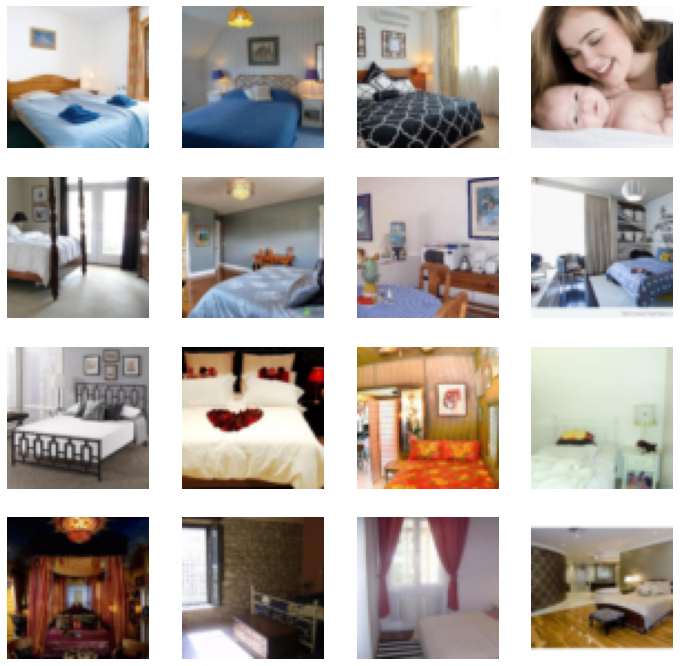

In [31]:
dls.show_batch(max_n=16)

In [32]:
generator = basic_generator(64, n_channels=3, n_extra_layers=1)

critic    = basic_critic(
                    64, 
                    n_channels=3, 
                    n_extra_layers=1, 
                    act_cls=partial(  nn.LeakyReLU, negative_slope=0.2)
)

In [33]:
learn = GANLearner.wgan(dls, generator, critic, opt_func = RMSProp)

In [34]:
learn.recorder.train_metrics=True
learn.recorder.valid_metrics=False


In [35]:


learn.fit(1, 2e-4, wd=0.)



epoch,train_loss,gen_loss,crit_loss,time
0,-0.781204,0.647050,-1.116500,01:34


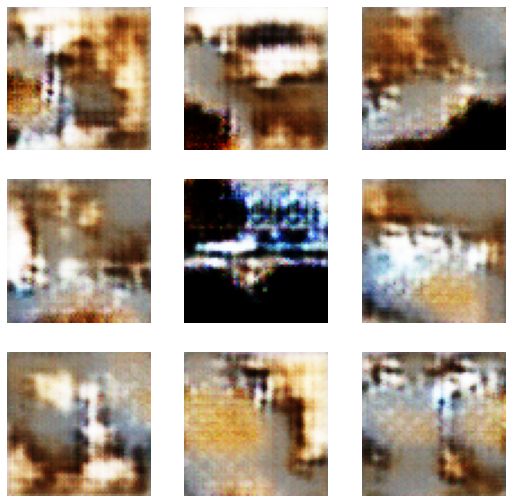

In [39]:

## matplotlib inline
learn.show_results(max_n=9, ds_idx=0)
## %matplotlib inline
## plt.show()